In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# # !pip install category_encoders

In [2]:
# crime_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-LA-Project/Mar424_converted_77_Features')
# print(crime_df.shape)

In [29]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
# Load the dataset
crime_df=pd.read_csv("crime_df_Hour_78f.csv", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (2883802, 78)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

In [45]:
# Convert 'Date_Rptd' and 'DATE_OCC' to datetime
crime_df['Date_Rptd'] = pd.to_datetime(crime_df['Date_Rptd'])

In [46]:
crime_df['TIME_OCC'].head()

0    13:50:00
1    01:00:00
2    02:30:00
3    00:45:00
4    11:30:00
Name: TIME_OCC, dtype: object

In [47]:
crime_df.columns

Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import scale

In [49]:
# Convert Hour to a categorical
crime_df['Hour'] = crime_df['Hour'].astype('category')

In [50]:
# Print data shape
print(f"Dataset shape: {crime_df.shape}\n")

missing_values = crime_df.isnull().sum()
percentage_missing = (missing_values / len(crime_df)) * 100
unique_values = crime_df.nunique()  # Count unique values in each column
non_missing_count = crime_df.count()  # Count non-missing values in each column

# Creating a DataFrame to:
summary_df = pd.DataFrame({
    'Data_type': crime_df.dtypes, # Display data type
    'Count': non_missing_count,  # Count of non-missing values
    'Missing': missing_values, # Missing values
    '%_Missing': percentage_missing, # Percentage of missing values
    'Unique_values': unique_values  # Unique values count
})

print(summary_df)

Dataset shape: (2883802, 78)

                  Data_type    Count  Missing  %_Missing  Unique_values
Date_Rptd    datetime64[ns]  2883802        0        0.0           5129
DATE_OCC             object  2883802        0        0.0           5111
TIME_OCC             object  2883802        0        0.0           1439
AREA_NAME            object  2883802        0        0.0             21
Rpt_Dist_No           int64  2883802        0        0.0           1302
...                     ...      ...      ...        ...            ...
Year_2020             int64  2883802        0        0.0              2
Year_2021             int64  2883802        0        0.0              2
Year_2022             int64  2883802        0        0.0              2
Year_2023             int64  2883802        0        0.0              2
Hour               category  2883802        0        0.0             24

[78 rows x 5 columns]


In [51]:
# Selecting predictor and target variables

X = crime_df.drop(['Date_Rptd','Rpt_Dist_No','DATE_OCC','TIME_OCC','AREA_NAME', 'Crm_Cd_Desc', 'Crm_Cd', 'Crime_Category_Code','Crime_Category'], axis=1)
y = crime_df['Crime_Category']

In [52]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Logistic Regression- Full: lr_full

In [54]:
# Training the model and predicting- LR-Full data

logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression
Accuracy: 0.7332638649284539
Confusion Matrix:
[[134140   1398     25   5221      3    507   2236      1]
 [    56  24066     69      1      6    165  17200     25]
 [  7973   3144    153    175     11  23468   7780     18]
 [ 16458    219      3   8620      1    622    420      1]
 [  5184   3131     32    465      5    277   4205     25]
 [  6663   2037   1247   2443      0 220917   3210     10]
 [  4250  14141     48     66      9    879  34963     24]
 [   888   5627     33      0      5      0  11738     54]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.76      0.93      0.84    143531
        Fraud and Financial Crimes       0.45      0.58      0.50     41588
              Miscellaneous Crimes       0.10      0.00      0.01     42722
             Robbery and Extortion       0.51      0.33      0.40     26344
                   Sexual Offenses       0.12      0.00

In [55]:
# Feature importances
feature_importances = logreg.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
10                              Weapon_Reported    2.294523
33                   Region_Ethnic_Origin_Black    0.286799
34  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.235121
11                                   Vict_Sex_M    0.159909
1                                      Vict_Age    0.125713
68                                         Hour    0.100793
5                                  Avg_Dewpoint    0.056223
67                                    Year_2023    0.053696
43                                Day_of_Week_6    0.053446
54                                     Month_12    0.053140
37                   Region_Ethnic_Origin_White    0.052492
4                                      Avg_Temp    0.050329
61                                    Year_2017    0.049609
47                                      Month_5    0.045419
45                                      Month_3    0.044601
44                 

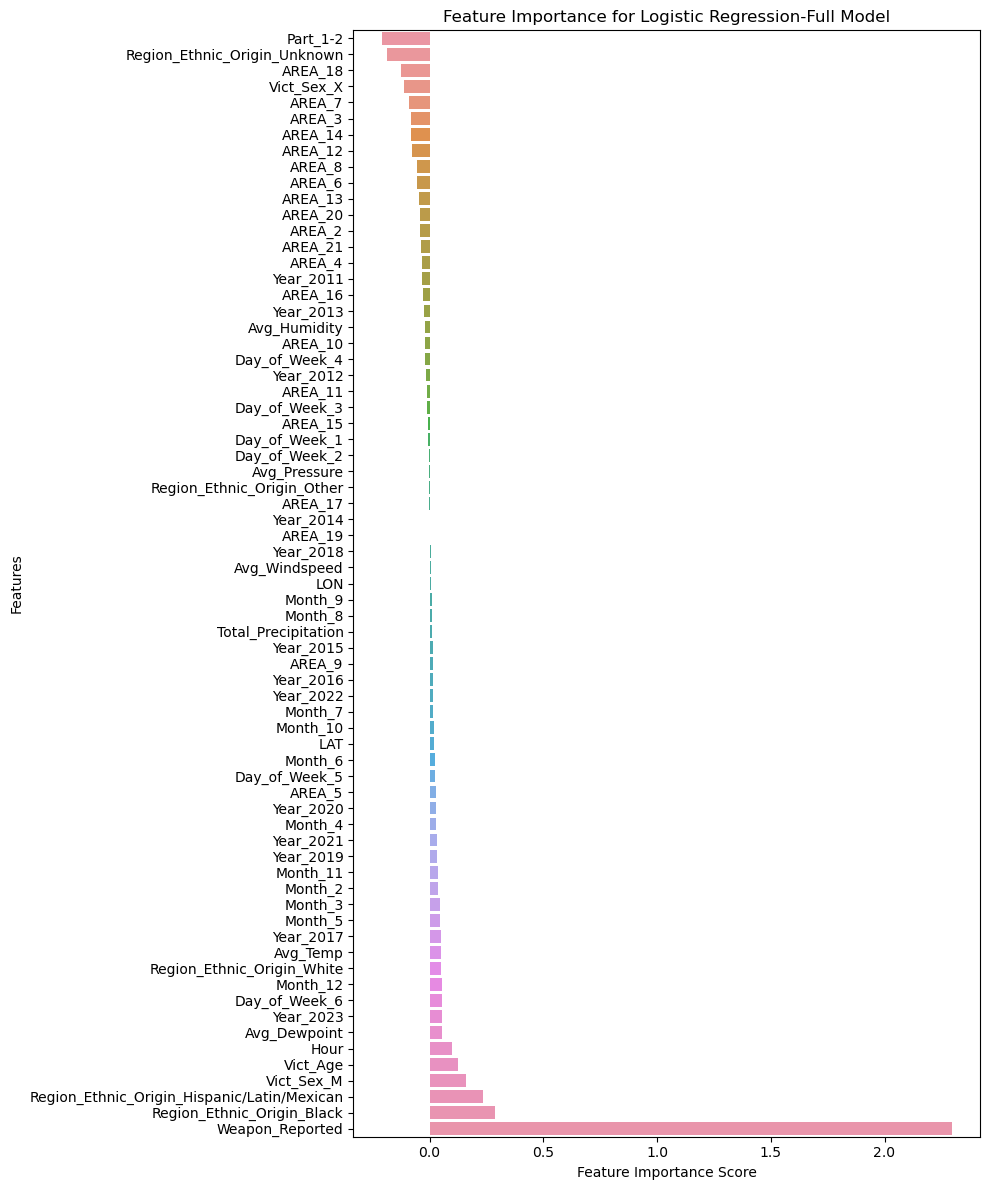

In [56]:
# Feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression-Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

ROC AUC: 0.8891531767903271
Accuracy: 0.7332638649284539
Sensitivity: 0.4280374277805208
Specificity: 0.9581064108384438


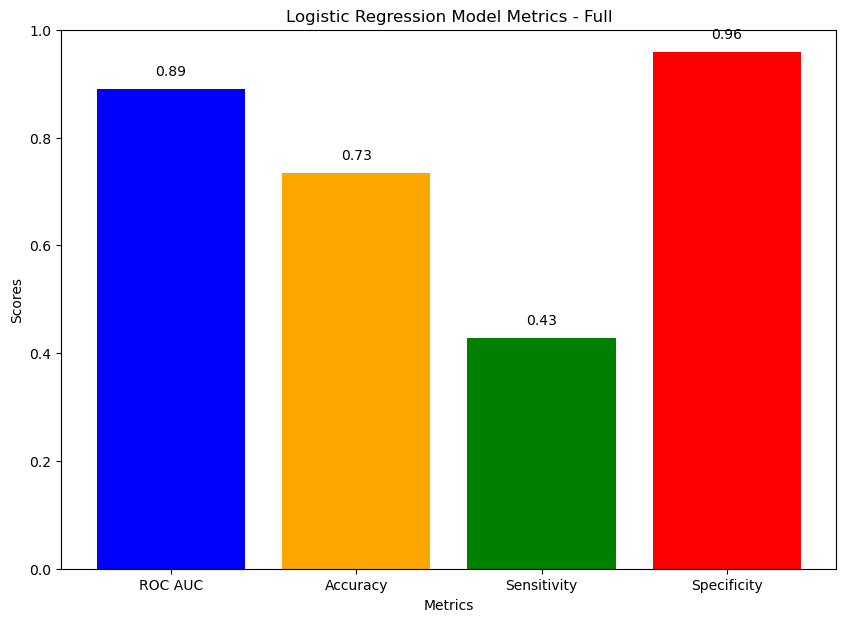

In [57]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate specificity for binary classification
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Calculate metrics
y_pred_prob = logreg.predict_proba(X_test_scaled)
y_pred = logreg.predict(X_test_scaled)

# For multi-class ROC AUC, y_test needs to be binarized
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class="ovr", average="macro")

# Calculate Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred, average="macro")

# Calculate Specificity
# Since specificity is not a built-in metric, we calculate it manually for each class and take the average
specificity_scores = []
for class_label in np.unique(y_train):
    # Binarize y_test for the current class
    y_test_binary = (y_test == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores.append(specificity(y_test_binary, y_pred_binary))

average_specificity = np.mean(specificity_scores)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Creating a dictionary for metrics to plot
metrics_dict = {
    'ROC AUC': roc_auc,
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': average_specificity
}

# Print the metrics
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", average_specificity)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Logistic Regression Model Metrics - Full')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


#

## Model XGBOOST -Full: xgboost_full

In [58]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, train your XGBClassifier with the encoded target variable
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the scaled test set using the trained model
y_pred = xgb_model.predict(X_test_scaled)

# If you need to convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("XGBoost")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate the classification report using the original string labels
# Convert encoded predictions back to original labels for interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred)
class_report = classification_report(y_test, y_pred_labels)
print(f"Classification Report:\n{class_report}")

XGBoost
Accuracy: 0.7663243527214912
Confusion Matrix:
[[132135   1159   1118   4883    732   1084   2393     27]
 [    56  29755    356      4    107    218  10823    269]
 [  5828   2475   3901    204    609  23568   5934    203]
 [ 14018    258     28  10376    350    987    319      8]
 [  3737   2885    507    445   2252    309   3077    112]
 [  4474   2702     32   2523    189 224239   2264    104]
 [  3707  10570    522     60     62    937  37987    535]
 [   856   5103    294      3     83     28  10637   1341]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.80      0.92      0.86    143531
        Fraud and Financial Crimes       0.54      0.72      0.62     41588
              Miscellaneous Crimes       0.58      0.09      0.16     42722
             Robbery and Extortion       0.56      0.39      0.46     26344
                   Sexual Offenses       0.51      0.17      0.25  

In [59]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
0                                      Part_1-2    0.407412
10                              Weapon_Reported    0.384497
35                   Region_Ethnic_Origin_Other    0.024447
12                                   Vict_Sex_X    0.016669
25                                      AREA_14    0.015010
11                                   Vict_Sex_M    0.010575
68                                         Hour    0.009822
1                                      Vict_Age    0.007978
36                 Region_Ethnic_Origin_Unknown    0.007545
33                   Region_Ethnic_Origin_Black    0.007488
16                                       AREA_5    0.007349
34  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.005446
63                                    Year_2019    0.004730
67                                    Year_2023    0.004499
43                                Day_of_Week_6    0.004114
29                 

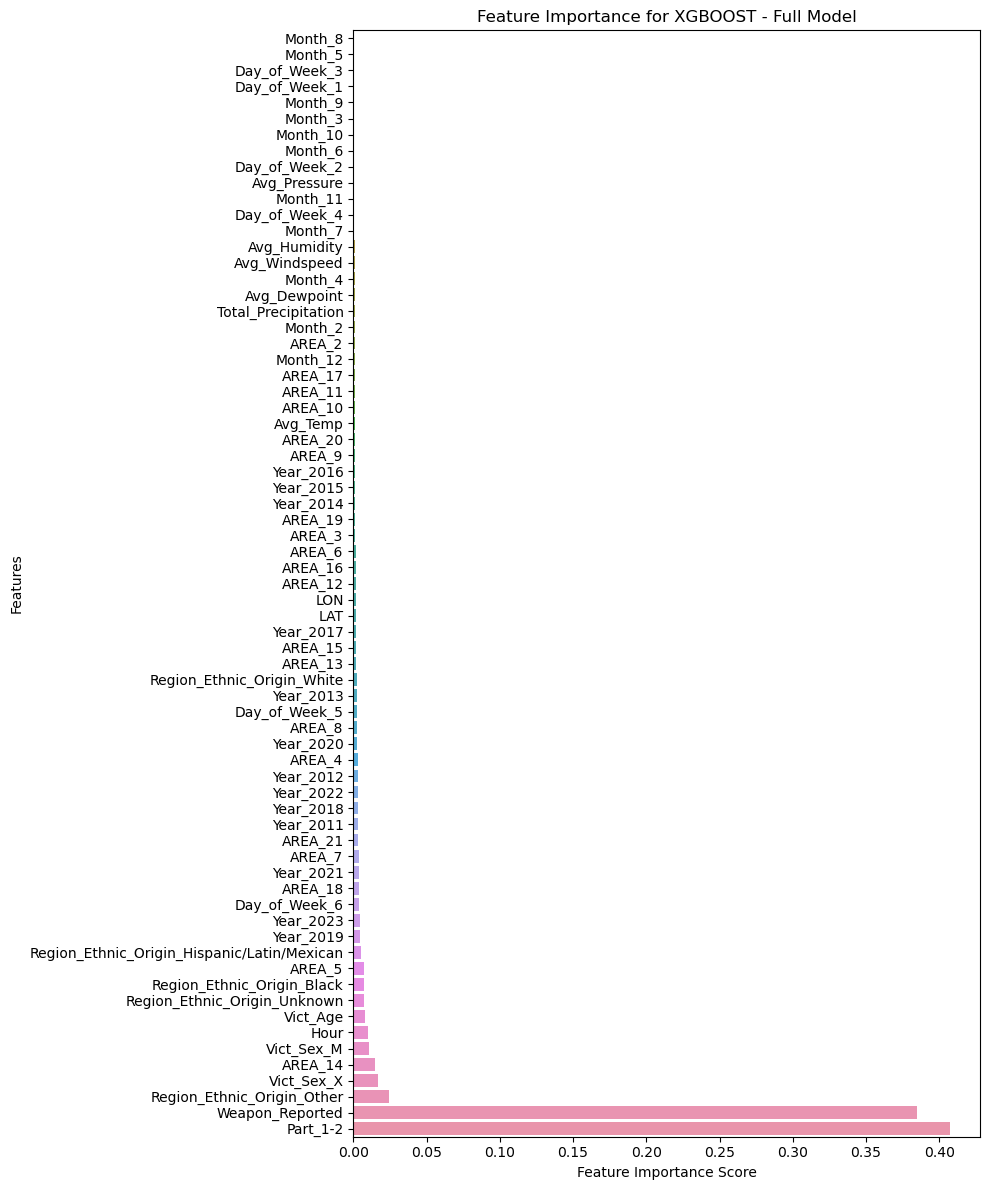

In [60]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBOOST - Full Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

ROC AUC: 0.8891531767903271
Accuracy: 0.7663243527214912
Sensitivity: 0.5012453868934132
Specificity: 0.9629795740283377


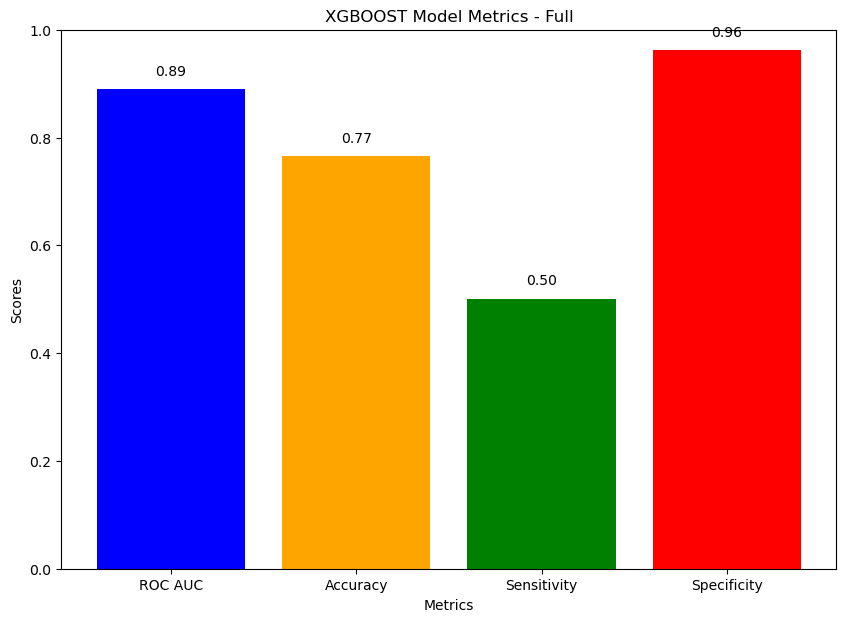

In [61]:
# Import necessary libraries
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Calculate Sensitivity (Recall) using encoded test labels
sensitivity = recall_score(y_test_encoded, y_pred, average="macro")

# For multi-class ROC AUC, y_test needs to be binarized using encoded labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

# Calculate ROC AUC using probabilities and binarized encoded test labels
roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class="ovr", average="macro")

# Calculate Specificity
# Since specificity is not a built-in metric, we calculate it manually for each class and take the average
specificity_scores = []
for class_label in np.unique(y_train_encoded):
    # Binarize y_test for the current class using encoded labels
    y_test_binary = (y_test_encoded == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores.append(specificity(y_test_binary, y_pred_binary))

average_specificity = np.mean(specificity_scores)

# Creating a dictionary for metrics to plot
metrics_dict = {
    'ROC AUC': roc_auc,
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': average_specificity
}

# Print the metrics
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", average_specificity)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('XGBOOST Model Metrics - Full')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


## Model Random Forest -Full: rf_full

In [62]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest classifier:", accuracy_rf)

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy of the random forest classifier: 0.8068905491182656
Confusion Matrix:
[[134910    984    637   3870    326    795   1943     66]
 [    65  31372    317      1    114    221   9128    370]
 [  4767   2008  11402    163    286  19412   4473    211]
 [ 11928    190     33  12896    180    858    249     10]
 [  3391   2243    577    422   3840    284   2441    126]
 [  3778   2236    527   1961     89 225892   1946     98]
 [  3096   8839    619     53     81    747  40167    778]
 [   751   4108    321      0     60     36   8165   4904]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.83      0.94      0.88    143531
        Fraud and Financial Crimes       0.60      0.75      0.67     41588
              Miscellaneous Crimes       0.79      0.27      0.40     42722
             Robbery and Extortion       0.67      0.49      0.56     26344
                   Sexual Offenses       0.

In [63]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
10                              Weapon_Reported    0.228685
0                                      Part_1-2    0.200730
1                                      Vict_Age    0.059956
2                                           LAT    0.053040
3                                           LON    0.052752
68                                         Hour    0.047047
6                                  Avg_Humidity    0.038776
4                                      Avg_Temp    0.038267
5                                  Avg_Dewpoint    0.038064
7                                 Avg_Windspeed    0.037045
8                                  Avg_Pressure    0.018108
12                                   Vict_Sex_X    0.009059
35                   Region_Ethnic_Origin_Other    0.008569
34  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.007359
11                                   Vict_Sex_M    0.006877
41                 

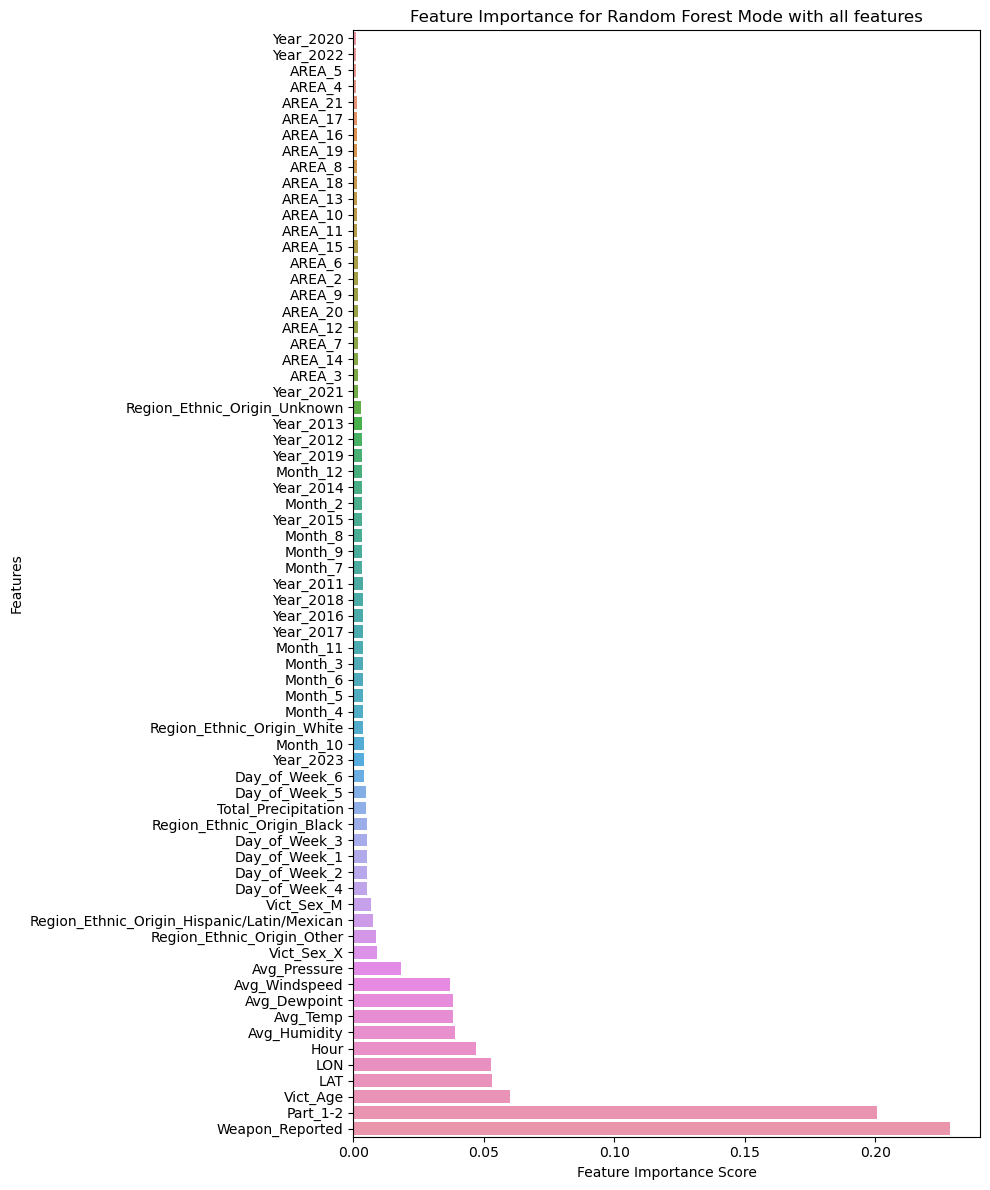

In [64]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest Mode with all features')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

ROC AUC: 0.8891531767903271
Accuracy: 0.8068905491182656
Sensitivity: 0.5874868666606663
Specificity: 0.9693751965296374


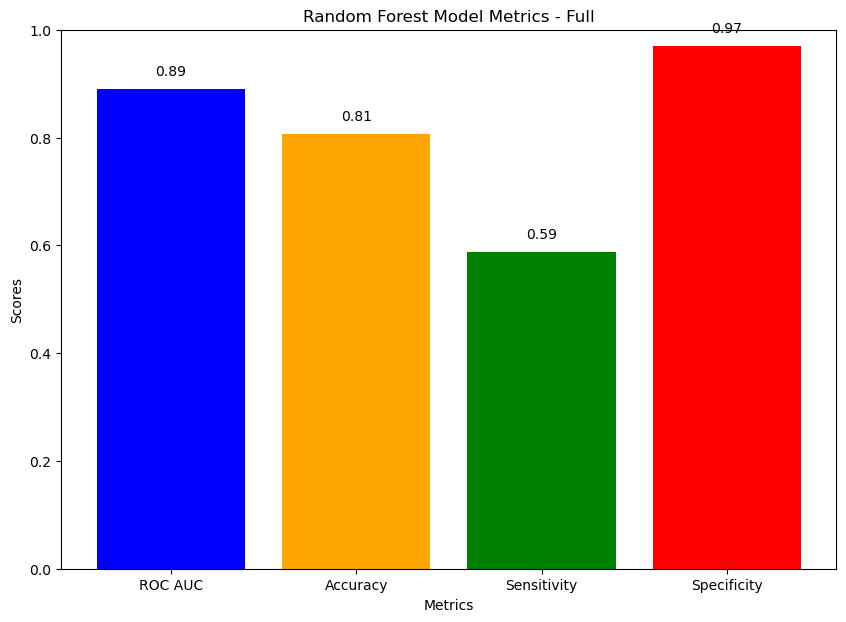

In [65]:
# Calculate Sensitivity (Recall)
sensitivity_rf = recall_score(y_test, y_pred, average="macro")

# For multi-class ROC AUC, y_test needs to be binarized
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Calculate ROC AUC
roc_auc_rf = roc_auc_score(y_test_binarized, y_pred_prob, multi_class="ovr", average="macro")

# Calculate Specificity
# Since specificity is not a built-in metric, we calculate it manually for each class and take the average
specificity_scores_rf = []
for class_label in np.unique(y_train):
    # Binarize y_test for the current class
    y_test_binary = (y_test == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores_rf.append(specificity(y_test_binary, y_pred_binary))

average_specificity_rf = np.mean(specificity_scores_rf)

# Creating a dictionary for metrics to plot
metrics_dict_rf = {
    'ROC AUC': roc_auc_rf,
    'Accuracy': accuracy_rf,
    'Sensitivity': sensitivity_rf,
    'Specificity': average_specificity_rf
}

# Print the metrics
print("ROC AUC:", roc_auc_rf)
print("Accuracy:", accuracy_rf)
print("Sensitivity:", sensitivity_rf)
print("Specificity:", average_specificity_rf)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict_rf.keys(), metrics_dict_rf.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Random Forest Model Metrics - Full')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict_rf.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


# KNN

In [66]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

KNN
Accuracy: 0.6524158186839957
Confusion Matrix:
[[122910   2735   1226   3167    348  10907   1993    245]
 [  5633  17539   1267     48    559  10194   5557    791]
 [  8682   2811   2912    265    275  25370   2088    319]
 [ 14069    209    220   4097     83   7450    186     30]
 [  5546   2103    435    242    601   3010   1173    214]
 [  9824   3565   4543   1469    293 214567   1952    314]
 [ 12038   9920   2004    165    618  16167  12115   1353]
 [  3928   3683    698     43    237   5122   3087   1547]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.67      0.86      0.75    143531
        Fraud and Financial Crimes       0.41      0.42      0.42     41588
              Miscellaneous Crimes       0.22      0.07      0.10     42722
             Robbery and Extortion       0.43      0.16      0.23     26344
                   Sexual Offenses       0.20      0.05      0.07     1

ROC AUC: 0.6422817835812953
Accuracy: 0.6524158186839957
Sensitivity: 0.3451398903642038
Specificity: 0.9394236767983868


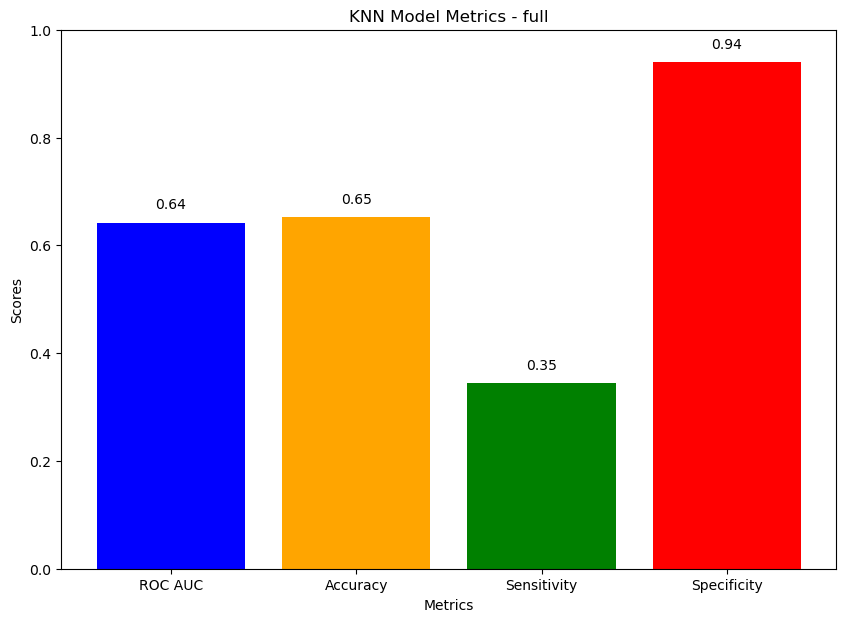

In [67]:
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Define the specificity function
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=np.unique(y_true)).ravel()
    return tn / (tn + fp)

# Assuming y_pred is already defined from your KNN model predictions
# Calculate Sensitivity (Recall)
sensitivity_knn = recall_score(y_test, y_pred, average="macro")

# Binarize y_test for ROC AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Generate dummy probabilities for KNN since KNN does not provide predict_proba by default
# For a more accurate ROC AUC, consider using a classifier that provides probability estimates
y_pred_prob_dummy = np.zeros((y_test_binarized.shape[0], y_test_binarized.shape[1]))
for idx, label in enumerate(np.unique(y_test)):
    y_pred_prob_dummy[:, idx] = (y_pred == label).astype(int)

# Calculate ROC AUC
roc_auc_knn = roc_auc_score(y_test_binarized, y_pred_prob_dummy, multi_class="ovr", average="macro")

# Calculate Specificity
specificity_scores_knn = []
for class_label in np.unique(y_test):
    y_test_binary = (y_test == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores_knn.append(specificity(y_test_binary, y_pred_binary))

average_specificity_knn = np.mean(specificity_scores_knn)

# Creating a dictionary for metrics to plot
metrics_dict_knn = {
    'ROC AUC': roc_auc_knn,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Sensitivity': sensitivity_knn,
    'Specificity': average_specificity_knn
}

# Print the metrics
print("ROC AUC:", roc_auc_knn)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity:", sensitivity_knn)
print("Specificity:", average_specificity_knn)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict_knn.keys(), metrics_dict_knn.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('KNN Model Metrics - full')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict_knn.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


In [68]:
# X columns
print('Shape of X:', X.shape)
print(X.columns)

Shape of X: (2883802, 69)
Index(['Part_1-2', 'Vict_Age', 'LAT', 'LON', 'Avg_Temp', 'Avg_Dewpoint',
       'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure', 'Total_Precipitation',
       'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X', 'AREA_2', 'AREA_3',
       'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10',
       'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16',
       'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20', 'AREA_21',
       'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
      

# Summary for all models- Full

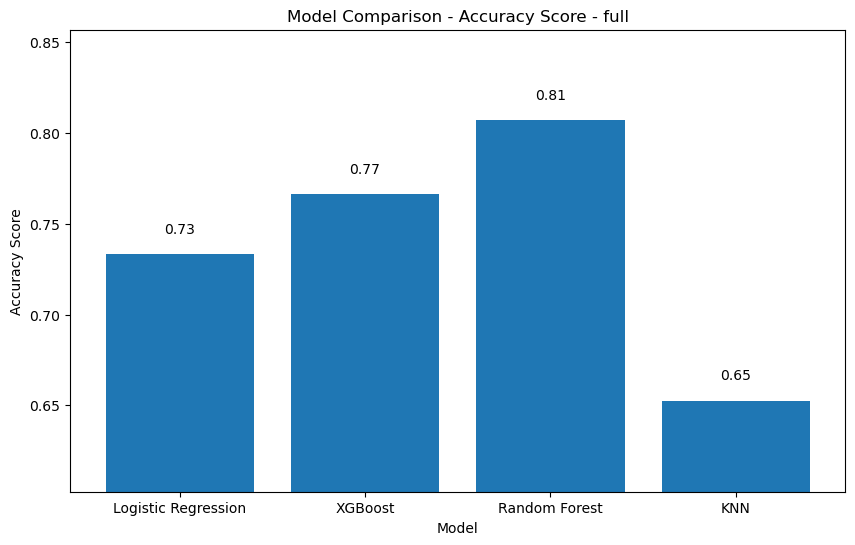

In [69]:
import matplotlib.pyplot as plt

# Placeholder for accuracy scores
accuracy_scores = {}

# Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test_scaled))
accuracy_scores['Logistic Regression'] = logreg_accuracy

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
accuracy_scores['XGBoost'] = xgb_accuracy

# Random Forest
rf_accuracy = accuracy_score(y_test, rf.predict(X_test_scaled))
accuracy_scores['Random Forest'] = rf_accuracy

# KNN
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
accuracy_scores['KNN'] = knn_accuracy

# Now create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Score - full')
plt.ylim([min(accuracy_scores.values()) - 0.05, max(accuracy_scores.values()) + 0.05])
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [70]:
# TP, FP, TN, and FN by model.

# Logistic Regression
y_pred = logreg.predict(X_test_scaled)
conf_matrix_logreg = metrics.confusion_matrix(y_test, y_pred)
TP_logreg = conf_matrix_logreg[1, 1]
FP_logreg = conf_matrix_logreg[0, 1]
TN_logreg = conf_matrix_logreg[0, 0]
FN_logreg = conf_matrix_logreg[1, 0]

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
conf_matrix_xgb = metrics.confusion_matrix(y_test_encoded, y_pred_xgb)
TP_xgb = conf_matrix_xgb[1, 1]
FP_xgb = conf_matrix_xgb[0, 1]
TN_xgb = conf_matrix_xgb[0, 0]
FN_xgb = conf_matrix_xgb[1, 0]

# Random Forest
y_pred_rf = rf.predict(X_test_scaled)
conf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
TP_rf = conf_matrix_rf[1, 1]
FP_rf = conf_matrix_rf[0, 1]
TN_rf = conf_matrix_rf[0, 0]
FN_rf = conf_matrix_rf[1, 0]

# KNN
y_pred_knn = knn.predict(X_test_scaled)
conf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
TP_knn = conf_matrix_knn[1, 1]
FP_knn = conf_matrix_knn[0, 1]
TN_knn = conf_matrix_knn[0, 0]
FN_knn = conf_matrix_knn[1, 0]

# Creating a DataFrame to summarize the model performance
model_performance_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'KNN'],
    'TP': [TP_logreg, TP_xgb, TP_rf, TP_knn],
    'FP': [FP_logreg, FP_xgb, FP_rf, FP_knn],
    'TN': [TN_logreg, TN_xgb, TN_rf, TN_knn],
    'FN': [FN_logreg, FN_xgb, FN_rf, FN_knn]
})

# Display the summary table
print("Model Performance Summary - full:")
print(model_performance_summary)


Model Performance Summary - full:
                 Model     TP    FP      TN    FN
0  Logistic Regression  24066  1398  134140    56
1              XGBoost  29755  1159  132135    56
2        Random Forest  31372   984  134910    65
3                  KNN  17539  2735  122910  5633


In [71]:
from sklearn.metrics import cohen_kappa_score

# Logistic Regression
y_pred_lr = logreg.predict(X_test_scaled)
cohen_kappa_score_lr = cohen_kappa_score(y_test, y_pred_lr)

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
cohen_kappa_score_xgb = cohen_kappa_score(y_test_encoded, y_pred_xgb)

# Random Forest
y_pred_rf = rf.predict(X_test_scaled)
cohen_kappa_score_rf = cohen_kappa_score(y_test, y_pred_rf)

# KNN
y_pred_knn = knn.predict(X_test_scaled)
cohen_kappa_score_knn = cohen_kappa_score(y_test, y_pred_knn)

# Create a dictionary to store the data
data = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'KNN'],
    'Cohen''s Kappa Score': [cohen_kappa_score_lr, cohen_kappa_score_xgb, cohen_kappa_score_rf, cohen_kappa_score_knn],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("Cohen's Kappa Score Summary - full:")
print(df.to_string())


Cohen's Kappa Score Summary - full:
                 Model  Cohens Kappa Score
0  Logistic Regression            0.633137
1              XGBoost            0.679297
2        Random Forest            0.736062
3                  KNN            0.503628


In [72]:
from sklearn.metrics import log_loss

# Logistic Regression
y_pred_prob_lr = logreg.predict_proba(X_test_scaled)
log_loss_lr = log_loss(y_test, y_pred_prob_lr)

# XGBoost
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)
log_loss_xgb = log_loss(y_test_encoded, y_pred_prob_xgb)

# Random Forest
y_pred_prob_rf = rf.predict_proba(X_test_scaled)
log_loss_rf = log_loss(y_test, y_pred_prob_rf)

# KNN
# KNN does not provide predict_proba by default
# For a more accurate log loss calculation, consider using a classifier that provides probability estimates
y_pred_prob_knn = np.zeros((y_test.shape[0], len(np.unique(y_test))))
for i, label in enumerate(np.unique(y_test)):
    y_pred_prob_knn[:, i] = (y_pred_knn == label).astype(int)
log_loss_knn = log_loss(y_test, y_pred_prob_knn)

# Creating a dictionary for log loss values
log_loss_dict = {
    'Logistic Regression': log_loss_lr,
    'XGBoost': log_loss_xgb,
    'Random Forest': log_loss_rf,
    'KNN': log_loss_knn
}

# Print the log loss values
print("Log Loss Values - full:")
for model, log_loss in log_loss_dict.items():
    print(f"{model}: {log_loss}")


Log Loss Values - full:
Logistic Regression: 0.7763223400448886
XGBoost: 0.6709623798196838
Random Forest: 0.70759399846529
KNN: 12.528203754894113


In [73]:
from sklearn.metrics import matthews_corrcoef

# Logistic Regression
y_pred_lr = logreg.predict(X_test_scaled)
MCC_lr = matthews_corrcoef(y_test, y_pred_lr)

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
MCC_xgb = matthews_corrcoef(y_test_encoded, y_pred_xgb)

# Random Forest
y_pred_rf = rf.predict(X_test_scaled)
MCC_rf = matthews_corrcoef(y_test, y_pred_rf)

# KNN
y_pred_knn = knn.predict(X_test_scaled)
MCC_knn = matthews_corrcoef(y_test, y_pred_knn)

# Creating a dictionary for MCC values
MCC_dict = {
    'Logistic Regression': MCC_lr,
    'XGBoost': MCC_xgb,
    'Random Forest': MCC_rf,
    'KNN': MCC_knn
}

# Print the MCC values
print("Mathew's Correlation Coefficient - full: ")
for model, MCC in MCC_dict.items():
    print(f"{model}: {MCC}")


Mathew's Correlation Coefficient - full: 
Logistic Regression: 0.639258609237637
XGBoost: 0.6837072833442289
Random Forest: 0.7391217729728775
KNN: 0.5128451955067308
